In [1]:
import os
import tweepy as tw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings

In [2]:
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [3]:
consumer_key= 'wd8QeEX7rCtzSUJE2IYwWmNdH'
consumer_secret= 'uef6FKCKqhKhSXy7Vvej7usqdOpsYzbhIWKsurzC5I6uUunky1'
access_token= '955854528666103808-VvxI8IJhvyODDZPyWp0lAtGATFlSBYY'
access_token_secret= 'HIStsQqPtUUmZbYQZwVI0LB3WYKav5aMgR6QG3PujbTtx'

In [4]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [35]:
#Not so needed, just updating my twiter handle from commandline
api.update_status("Look, I'm tweeting from #Python in my #earthanalytics class! @EarthLabCU")

Status(_api=<tweepy.api.API object at 0x7ff946a3ecd0>, _json={'created_at': 'Fri Sep 04 18:47:58 +0000 2020', 'id': 1301955179265380355, 'id_str': '1301955179265380355', 'text': "Look, I'm tweeting from #Python in my #earthanalytics class! @EarthLabCU", 'truncated': False, 'entities': {'hashtags': [{'text': 'Python', 'indices': [24, 31]}, {'text': 'earthanalytics', 'indices': [38, 53]}], 'symbols': [], 'user_mentions': [{'screen_name': 'EarthLabCU', 'name': 'Earth Lab CU-Boulder', 'id': 775785252786544641, 'id_str': '775785252786544641', 'indices': [61, 72]}], 'urls': []}, 'source': '<a href="http://www.aimssenegal.com" rel="nofollow">EdemSelase</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 955854528666103808, 'id_str': '955854528666103808', 'name': 'Bright Silas', 'screen_name': 'delademselase', 'location': '', 'description': '', 'url': None, 'entitie

In [14]:
#Define the search word or words of interest
search_words = "@CentralBankRw"
date_since = "2017-01-01"

In [15]:
# Collect tweets. you can limit the nunmber of tweets to collect.
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(200)
tweets


In [16]:
# Collect tweets
tweets = tw.Cursor(api.search,
                       q=search_words,
                       lang="en",
                       since=date_since).items(1000)

# Collect a list of tweets using list comprehension
[tweet.text for tweet in tweets]

['RT @CentralBankRw: The National Bank of #Rwanda is pleased to announce that it has been awarded the "ACCA Approved Employer – Professional…',
 '“For you to succeed in life of business you need to capitalize on doubling your strengths and in doing so, your wea… https://t.co/UUIjy56drE',
 'RT @CentralBankRw: The National Bank of #Rwanda is pleased to announce that it has been awarded the "ACCA Approved Employer – Professional…',
 'RT @CentralBankRw: The National Bank of #Rwanda is pleased to announce that it has been awarded the "ACCA Approved Employer – Professional…',
 'RT @bk_capital: Below are highlights from our Half-Year 2020 Market Report shared with our Investors; We considered the Domestic listed com…',
 'RT @CentralBankRw: Benefits of ACCA Approved Employer -Professional Development include;\n\n1. Attracting and Retaining the best talents in t…',
 'RT @CentralBankRw: The National Bank of #Rwanda is pleased to announce that it has been awarded the "ACCA Approved Employer – Pro

In [13]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(500)

# Iterate and print tweets using loop
for tweet in tweets:
    print(tweet.text)

RT @CentralBankRw: The National Bank of #Rwanda is pleased to announce that it has been awarded the "ACCA Approved Employer – Professional…
“For you to succeed in life of business you need to capitalize on doubling your strengths and in doing so, your wea… https://t.co/UUIjy56drE
RT @CentralBankRw: The National Bank of #Rwanda is pleased to announce that it has been awarded the "ACCA Approved Employer – Professional…
RT @CentralBankRw: The National Bank of #Rwanda is pleased to announce that it has been awarded the "ACCA Approved Employer – Professional…
RT @bk_capital: Below are highlights from our Half-Year 2020 Market Report shared with our Investors; We considered the Domestic listed com…
RT @CentralBankRw: Benefits of ACCA Approved Employer -Professional Development include;

1. Attracting and Retaining the best talents in t…
RT @CentralBankRw: The National Bank of #Rwanda is pleased to announce that it has been awarded the "ACCA Approved Employer – Professional…
RT @AFRwanda: AFR

RT @bk_capital: Below are highlights from our Half-Year 2020 Market Report shared with our Investors; We considered the Domestic listed com…
Eurobonds are International bonds issued outside of the country in a currency other than the home currency.We highl… https://t.co/yI1QjBr5Eo
Every Thursday,T-Bills are issued by the Central Bank. Last week, the 364 days Treasury bill rate was below 8% for… https://t.co/EGsEQ0zfhK
RT @bk_capital: Below are highlights from our Half-Year 2020 Market Report shared with our Investors; We considered the Domestic listed com…
RT @bk_capital: Below are highlights from our Half-Year 2020 Market Report shared with our Investors; We considered the Domestic listed com…
RT @bk_capital: Below are highlights from our Half-Year 2020 Market Report shared with our Investors; We considered the Domestic listed com…
RT @bk_capital: Below are highlights from our Half-Year 2020 Market Report shared with our Investors; We considered the Domestic listed com…
Below are high

RT @CentralBankRw: Following a high demand for Government bonds, demonstrated by an oversubscription for each issuance-subscription level a…
RT @CentralBankRw: @CentralBankRw is pleased to announce the release of the Monetary Policy and Financial Stability Statement for the first…
RT @RDBrwanda: "In terms of size, we have capped it at Rwf75million for large SMEs and large corporates working with banks. For MFIs, the g…
RT @RDBrwanda: “I encourage businesses to apply for funding. The ERF is a highly de-risked facility both for financial institutions and cli…
RT @CentralBankRw: The number of POS (traditional and new POS) increased from 20,094 in June 2019 to 41,560 in June 2020—largely due to new…
@CentralBankRw Good Morning, kindly what is the procedure for getting CRB  certificate for a company in Rwanda?  Yo… https://t.co/hB1lBGxHVu
“The big secret in life is that there is no secret. Whatever your goal, you can get there if you’re willing to work… https://t.co/fu78nhzzyY
RT @CentralBa

RT @CentralBankRw: The financial sector remains dominated by the banking sector which accounts for 67.0% of the total financial sector asse…
RT @CentralBankRw: @LucyMbabazi Refer to page 75 for more details... https://t.co/TYkVG0rcTA
RT @CentralBankRw: The major sectors that contributed to the contraction in NALs in 2020H1, are manufacturing activities, water and energy,…
@CentralBankRw thank you.
RT @CentralBankRw: @LucyMbabazi Refer to page 75 for more details... https://t.co/TYkVG0rcTA
RT @CentralBankRw: Total assets of MFIs increased by 5.4% year on year from FRW 313 billion in June 2019 to FRW 330 billion in June 2020. M…
RT @CentralBankRw: The financial sector remains dominated by the banking sector which accounts for 67.0% of the total financial sector asse…
RT @CentralBankRw: The strong growth of deposits by 17.8 percent in June 2020, up from 13.2 percent in June 2019, also supported the growth…
RT @CentralBankRw: Assets of the banking sector continued to grow- the system wide 

RT @CentralBankRw: In the first half of 2020, New Authorized Loans( NALs) reduced by 9.2 percent.

#MPFSS2020 https://t.co/dl4L5ZABf0
RT @CentralBankRw: In the first half of 2020, New Authorized Loans( NALs) reduced by 9.2 percent.

#MPFSS2020 https://t.co/dl4L5ZABf0
RT @CentralBankRw: The major sectors that contributed to the contraction in NALs in 2020H1, are manufacturing activities, water and energy,…
@HolyPowerless @CentralBankRw Any idea why?
RT @CentralBankRw: In the first half of 2020, New Authorized Loans( NALs) reduced by 9.2 percent.

#MPFSS2020 https://t.co/dl4L5ZABf0
#Rwandan Currency 
The Rwandan currency (Rwandan Franc) keeps losing value against major currencies. 

What's happe… https://t.co/qXfffqBPl9
RT @CentralBankRw: In the first half of 2020, Broad money M3 picked up. Credit to the private sector mostly contributed to the growth in M3…
RT @CentralBankRw: World annual average inflation is projected to decelerate to 3.0%, following a sharp drop in global demand and f

RT @CentralBankRw: World annual average inflation is projected to decelerate to 3.0%, following a sharp drop in global demand and falling c…
RT @CentralBankRw: For the year 2020, the economy is expected to perform well below this average due to the adverse effects from the COVID-…
RT @CentralBankRw: World annual average inflation is projected to decelerate to 3.0%, following a sharp drop in global demand and falling c…
RT @CentralBankRw: Growth in Sub-Suharan Africa is projected to contract to -3.2%. This recession is the first in the region in the last 25…
RT @CentralBankRw: @CentralBankRw is pleased to announce the release of the Monetary Policy and Financial Stability Statement for the first…
RT @CentralBankRw: @CentralBankRw is pleased to announce the release of the Monetary Policy and Financial Stability Statement for the first…
RT @RDBrwanda: @ankuranga on why businesses should take advantage of the ERF: "The terms and conditions are more favourable than the usual…
@ankuranga on 

In [60]:
#ignore all retweets with the filter keyword. This is done so remove duplicate tweets from our analysis
new_search = search_words + " -filter:retweets"
new_search

'#Dr UN -filter:retweets'

In [61]:
tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items(50)

[tweet.text for tweet in tweets]

["By now I sure say Berla Mundi take her own dash de local 'apio' seller for her hood😂... lol\n\n#Dr UN",
 '@KiDiMusic @TeddyRiley1 Say cheese, take a picture\nStrike a pose make I see you take a picture\n#Dr UN https://t.co/YfgRDCG2QO',
 'The cocktail mixers dierr, I sure say Titi dey use mix sobolo by now 😂😂😂\n#Dr UN',
 'Watch "Linkup Daddy - Roadmen ft. Bpm Boss (Official Video)" on YouTube https://t.co/nxbnVQ8vF1 \n#Dr UN\n#Sarkodie',
 '#30minutes Olele #DR UN  fit sell the whole Ghana sef la😂😂😂 guy is the real GOAT',
 'My Beautiful Ladies please your handbags are in stock and it’s selling at wholesale prices. Visit my shop to make a… https://t.co/5yVeJcNMXu',
 'that red, yellow, blue rope around their neck.. Pls wat is that??.. #Dr. UN',
 'Its not Kumasi its Kumerica\n\nAny way how do I look \n#Kwesi Arthur\n#Dr UN\n#Wendy Shay https://t.co/aExYcP5PZG',
 '@sarkodie The agenda di3 it must agend #DR.UN',
 'When @manifestive said he finds it upsetting seeing  " Ghanaians so obsessed 

In [62]:
#type tweet and use the Tab key to see available options
tweets = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since).items(5)

users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users_locs

[['ilyEdison', 'KNUST'],
 ['BriDen_OY', 'Sunyani'],
 ['ilyEdison', 'KNUST'],
 ['StanleyAnsah8', ''],
 ['kafui_dearie', 'Accra, Ghana']]

In [63]:
#Create a pandas dataframe
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "location"])
tweet_text 

,user,location
0,ilyEdison,KNUST
1,BriDen_OY,Sunyani
2,ilyEdison,KNUST
3,StanleyAnsah8,
4,kafui_dearie,"Accra, Ghana"


In [18]:
#Getting a compound tweet like climate change and indexing them
new_search = "climate+change -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=new_search,
                   lang="en",
                   since='2018-04-23').items(1000)

all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]


KeyboardInterrupt: 

In [64]:
tweet

Status(_api=<tweepy.api.API object at 0x7ff946a3ecd0>, _json={'created_at': 'Wed Sep 02 12:58:48 +0000 2020', 'id': 1301142534035574784, 'id_str': '1301142534035574784', 'text': "¿Es posible un tratamiento para #TB #MDR latente?\n \nJ. Furin:\nIf people live in a household newly diagnosed, there'… https://t.co/YiuXeW8UAz", 'truncated': True, 'entities': {'hashtags': [{'text': 'TB', 'indices': [32, 35]}, {'text': 'MDR', 'indices': [36, 40]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/YiuXeW8UAz', 'expanded_url': 'https://twitter.com/i/web/status/1301142534035574784', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': 1301140601564549123, 'in_reply_to_status_id_str': '1301140601564549123', 'in_reply_to_user_id': 97701812, 'in_reply_to_user_id_str': '97701812', 'in_reply

In [69]:
# Word frequency
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())




In [79]:
search_term = "#Dr UN -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[20]

'Es posible un tratamiento para TB MDR latente J FurinIf people live in a household newly diagnosed there'

In [80]:
#Put tweets in the same case to enable uniques wording

all_tweets_no_urls[0].lower().split()
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['this',
  'is',
  'my',
  'hustle',
  'bless',
  'me',
  'with',
  'a',
  'retweetmy',
  'customer',
  'might',
  'be',
  'on',
  'your',
  'tl',
  'god',
  'bless',
  'you',
  'call',
  'or',
  'whatsapp',
  'on',
  '0546'],
 ['this',
  'is',
  'my',
  'hustle',
  'bless',
  'me',
  'with',
  'a',
  'retweetmy',
  'customer',
  'might',
  'be',
  'on',
  'your',
  'tl',
  'god',
  'bless',
  'you',
  'call',
  'or',
  'whatsapp',
  'on',
  '0546']]

In [81]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('a', 12),
 ('on', 11),
 ('bless', 10),
 ('un', 10),
 ('is', 8),
 ('the', 8),
 ('dr', 8),
 ('my', 7),
 ('with', 7),
 ('you', 7),
 ('this', 6),
 ('your', 6),
 ('and', 6),
 ('hustle', 5),
 ('me', 5)]

In [82]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,a,12
1,on,11
2,bless,10
3,un,10
4,is,8


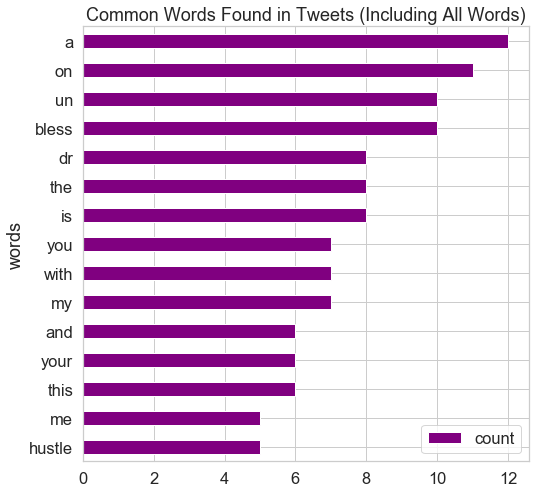

In [83]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [84]:
#Remove Stopwords
stop_words = set(stopwords.words('english'))
list(stop_words)[0:10]

['its',
 'will',
 "mightn't",
 'he',
 'itself',
 'further',
 "it's",
 'are',
 'mightn',
 "shouldn't"]

In [88]:

        tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]
        # remove stop words

In [89]:
tweets_nsw[0]

['hustle',
 'bless',
 'retweetmy',
 'customer',
 'might',
 'tl',
 'god',
 'bless',
 'call',
 'whatsapp',
 '0546']

In [90]:
#most common words after stopwords
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('bless', 10),
 ('un', 10),
 ('dr', 8),
 ('hustle', 5),
 ('retweetmy', 5),
 ('customer', 5),
 ('might', 5),
 ('tl', 5),
 ('god', 5),
 ('call', 5),
 ('whatsapp', 5),
 ('0546', 5),
 ('drun', 4),
 ('say', 3),
 ('take', 3)]

In [43]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

NameError: name 'counts_nsw' is not defined

In [92]:
#Used to remove collection words. Collection words are words related to the search word!

collection_words = ['un', 'dr', 'dr un']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]